# Analysis of Antiretroviral Services Data by Subcounty, October-December 2024 and Merging with Subcounty Geographic Data

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
art = pd.read_csv('PLHIV receiving ART Treatment by Facility.xlsx - TX_CURR.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
art.head()

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male"
0,Northern Region,North East,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,122,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,16.0,39.0,38.0,10.0,6.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0,0,1,1,NaN,NaN,0,0,3,93,NaN,NaN,0,0,0,24
1,Northern Region,Mid Northern,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,692,0.0,0.0,0.0,1.0,7.0,8.0,6.0,30.0,47.0,72.0,45.0,24.0,24.0,13.0,5.0,7.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0,12.0,14.0,49.0,87.0,103.0,82.0,19.0,16.0,10.0,0,0,0,0,0,NaN,NaN,1,1,31,39,NaN,NaN,6,2,132,143,NaN,NaN,1,0,118,218
2,Eastern Region,North East,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC Soroti Region,87041.0,CDC,l86BIz6pDzr,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,13,4,NaN,NaN,0,0,0,0
3,Eastern Region,North East,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC Soroti Region,87041.0,CDC,JXTSTKGSHxq,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,240,0.0,0.0,2.0,3.0,2.0,1.0,9.0,15.0,21.0,17.0,16.0,18.0,15.0,8.0,13.0,5.0,0.0,0.0,2.0,4.0,2.0,2.0,4.0,7.0,6.0,10.0,22.0,10.0,13.0,4.0,5.0,4.0,0,0,0,0,0,NaN,NaN,3,3,14,5,NaN,NaN,4,5,68,50,NaN,NaN,56,32,0,0
4,Northern Region,Mid Northern,yDPmjwoOIxi,Alebtong District,Abako Subcounty,Abako Health Centre III,JCRC Kigezi Lango,81997.0,USAID,vitFG8P7w6d,yDP

## Calculating subcounty totals for ART services

In [6]:
art.shape

(2179, 75)

In [7]:
subcounty_totals = art.groupby(['PIRS District ', 'PIRS Subcounty'])['Numerator (Overall TOTAL) '].sum().reset_index()

In [8]:
subcounty_totals

,PIRS District,PIRS Subcounty,Numerator (Overall TOTAL)
0,Abim District,Abim Subcounty,72
1,Abim District,Abim Town Council,588
2,Abim District,Alerek Town Council,225
3,Abim District,Atunga Subcounty,45
4,Abim District,Awach Subcounty,133
...,...,...,...
1358,Zombo District,Paidha Town Council,1928
1359,Zombo District,Warr Subcounty,230
1360,Zombo District,Warr Town Council,570
1361,Zombo District,Zeu Subcounty,781


In [9]:
subcounty_totals = subcounty_totals.rename(columns={'Numerator (Overall TOTAL) ': 'subcounty_ART_total'})

In [10]:
art2 = pd.merge(art, subcounty_totals, on=['PIRS District ', 'PIRS Subcounty'], how='left')

In [11]:
art2.head()

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total
0,Northern Region,North East,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,122,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,16.0,39.0,38.0,10.0,6.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0,0,1,1,NaN,NaN,0,0,3,93,NaN,NaN,0,0,0,24,140.0
1,Northern Region,Mid Northern,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,692,0.0,0.0,0.0,1.0,7.0,8.0,6.0,30.0,47.0,72.0,45.0,24.0,24.0,13.0,5.0,7.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0,12.0,14.0,49.0,87.0,103.0,82.0,19.0,16.0,10.0,0,0,0,0,0,NaN,NaN,1,1,31,39,NaN,NaN,6,2,132,143,NaN,NaN,1,0,118,218,1022.0
2,Eastern Region,North East,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC Soroti Region,87041.0,CDC,l86BIz6pDzr,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,13,4,NaN,NaN,0,0,0,0,536.0
3,Eastern Region,North East,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC Soroti Region,87041.0,CDC,JXTSTKGSHxq,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,240,0.0,0.0,2.0,3.0,2.0,1.0,9.0,15.0,21.0,17.0,16.0,18.0,15.0,8.0,13.0,5.0,0.0,0.0,2.0,4.0,2.0,2.0,4.0,7.0,6.0,10.0,22.0,10.0,13.0,4.0,5.0,4.0,0,0,0,0,0,NaN,NaN,3,3,14,5,NaN,NaN,4,5,68,50,NaN,NaN,56,32,0,0,240.0
4,Northern Region,Mid Northern,yDPmjwoOIxi,Alebtong District,Abako Subcounty,Abako Health Centre III,JC

In [12]:
import numpy as np

## Creating a variable for the percentage of the subcounty reached by ART

In [13]:
art2['pct_art_pop_subcounty'] = art2['Numerator (Overall TOTAL) ']/art2['subcounty_ART_total']

In [14]:
art2['pct_art_pop_subcounty'] = art2['pct_art_pop_subcounty'].replace(0, np.nan)

In [15]:
art2['pct_art_pop_subcounty'].min()

0.0009283671877901148

In [16]:
art2.head()

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total,pct_art_pop_subcounty
0,Northern Region,North East,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,W3hXYmtaQ4Q,Kotido District,Nakapelimo Subcounty,405 Brigade Health Centre III,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,122,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,16.0,39.0,38.0,10.0,6.0,0.0,0.0,0,0,0,0,0,NaN,NaN,0,0,1,1,NaN,NaN,0,0,3,93,NaN,NaN,0,0,0,24,140.0,0.871429
1,Northern Region,Mid Northern,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC DOD/UPDF,160698.0,DOD,OELkOLxvZxB,auzuV39xOTU,Pader District,Pader Subcounty,5th Military Division Health Centre IV,URC_DOD_UPDF,160698,DOD,DSD,FY2025Q1,692,0.0,0.0,0.0,1.0,7.0,8.0,6.0,30.0,47.0,72.0,45.0,24.0,24.0,13.0,5.0,7.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0,12.0,14.0,49.0,87.0,103.0,82.0,19.0,16.0,10.0,0,0,0,0,0,NaN,NaN,1,1,31,39,NaN,NaN,6,2,132,143,NaN,NaN,1,0,118,218,1022.0,0.677104
2,Eastern Region,North East,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC Soroti Region,87041.0,CDC,l86BIz6pDzr,J2JiemiIQvD,Katakwi District,Usuk Subcounty,Aakum Health Centre II,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN,NaN,0,0,13,4,NaN,NaN,0,0,0,0,536.0,NaN
3,Eastern Region,North East,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC Soroti Region,87041.0,CDC,JXTSTKGSHxq,aVQCbe80pl7,Serere District,Labori Subcounty,Aarapoo Health Centre III,AIC_Soroti Region,87041,CDC,DSD,FY2025Q1,240,0.0,0.0,2.0,3.0,2.0,1.0,9.0,15.0,21.0,17.0,16.0,18.0,15.0,8.0,13.0,5.0,0.0,0.0,2.0,4.0,2.0,2.0,4.0,7.0,6.0,10.0,22.0,10.0,13.0,4.0,5.0,4.0,0,0,0,0,0,NaN,NaN,3,3,14,5,NaN,NaN,4,5,68,50,NaN,NaN,56,32,0,0,240.0,1.000000
4,Northern Region,Mid Northern,yDPmjwoOIxi,Alebton

In [17]:
art2.to_csv('uganda_art_revised.csv', index=False)

In [18]:
art2.groupby('PIRS Subcounty')['pct_art_pop_subcounty'].sum().sort_values()

PIRS Subcounty
Bwanswa Subcounty       0.0
Mafudu Subcounty        0.0
Apala Subcounty         0.0
Labongo Subcounty       0.0
Bwikhonge Subcounty     0.0
                       ... 
Eastern Division        4.0
Western Division        6.0
Northern Division       7.0
Southern Division       8.0
Central Division       13.0
Name: pct_art_pop_subcounty, Length: 1313, dtype: float64

## Creating variables for each funding agency

In [19]:
art2['usaid'] = (art2['COP US Agency'] == 'USAID').astype(int)

In [20]:
art2['cdc'] = (art2['COP US Agency'] == 'CDC').astype(int)

In [21]:
art2['dod'] = (art2['COP US Agency'] == 'DOD').astype(int)

In [104]:
art2.sort_values(by='pct_art_pop_subcounty',ascending=False).head(100)

,Statistical Region,UAIS 2011_ Region,PIRS UnitID,PIRS District,PIRS Subcounty,PIRS Service outlet,PIRS Mechanism name,pirs Mechanism ID,PIRS US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Type of Support,Period,Numerator (Overall TOTAL),Unknown age Female,Female\n<1yr,Female\n1-4yrs,Female\n5-9yrs,Female\n10-14 yrs,Female\n15-19 yrs,Female\n20-24 yrs,Female\n25-29 yrs,Female\n30-34 yrs,Female\n35-39 yrs,Female\n40-44 yrs,Female\n45-49 yrs,Female\n 50-54 yrs,Female\n 55-59 yrs,Female\n 60-64 yrs,Female\n 65+ yrs,Male\nUnknown age,Male\n<1yr,Male\n1-4yrs,Male\n5-9yrs,Male\n10-14 yrs,Male\n15-19 yrs,Male\n20-24 yrs,Male\n25-29 yrs,Male\n30-34 yrs,Male\n35-39 yrs,Male\n40-44 yrs,Male\n45-49 yrs,Male\n 50-54 yrs,Male\n 55-59 yrs,Male\n 60-64 yrs,Male\n 65+ yrs,"Sex Workers, Female",People in prisons and other enclosed settings (Incarcerated Population),PWID,MSM,Transgender,"<3 months of ARVs dispensed by Unknown Age, Female","<3 months of ARVs dispensed by Unknown Age, Male","<3 months of ARVs dispensed by <15yrs, Female","<3 months of ARVs dispensed by <15yrs, Male","<3 months of ARVs dispensed by 15+yrs, Female","<3 months of ARVs dispensed by 15+yrs, Male","3-5 months of ARVs dispensed to patient by Unknown Age, Female","3-5 months of ARVs dispensed to patient by Unknown Age, Male","3-5 months of ARVs dispensed to patient by <15yrs, Female","3-5 months of ARVs dispensed to patient by <15yrs, Male","3-5 months of ARVs dispensed to patient by 15+yrs, Female","3-5 months of ARVs dispensed to patient by 15+yrs, Male","4 or more months of ARVs dispensed to patient by Unknown Age, Female","5 or more months of ARVs dispensed to patient by Unknown Age, Male","6 or more months of ARVs dispensed to patient by <15yrs, Female","6 or more months of ARVs dispensed to patient by <15yrs, Male","6 or more months of ARVs dispensed to patient by 15+yrs, Female","6 or more months of ARVs dispensed to patient by 15+yrs, Male",subcounty_ART_total,pct_art_pop_subcounty,usaid,cdc,dod
724,Western Region,Mid Western,dim1yW6CLFU,Kitagwenda District,Buhanda Subcounty,Kakasi COU Health Centre II,UPMB,84980.0,CDC,nBYpLOh2dQa,dim1yW6CLFU,Kitagwenda District,Kakasi Subcounty,Kakasi COU Health Centre III,UPMB,84980,CDC,DSD,FY2025Q1,462,0.0,0.0,1.0,1.0,5.0,7.0,30.0,43.0,54.0,41.0,40.0,30.0,20.0,18.0,4.0,3.0,0.0,0.0,1.0,2.0,1.0,5.0,1.0,11.0,19.0,30.0,25.0,24.0,22.0,11.0,5.0,8.0,0,0,0,0,0,NaN,NaN,5,4,68,39,NaN,NaN,2,0,107,67,NaN,NaN,0,0,115,55,462.0,1.0,0,1,0
1749,Western Region,South Western,HlsEfEtkMwL,Kisoro District,Nyarubuye Subcounty,Nyarubuye Health Centre III,JCRC Kigezi Lango,81997.0,USAID,kuudLnBp24i,HlsEfEtkMwL,Kisoro District,Nyarubuye Subcounty,Nyarubuye Health Centre III,JCRC_Kigezi Lango Region,81997,USAID,DSD,FY2025Q1,94,0.0,0.0,1.0,0.0,0.0,0.0,2.0,11.0,9.0,10.0,4.0,12.0,3.0,1.0,2.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,8.0,3.0,7.0,3.0,1.0,3.0,0.0,0,0,0,0,0,NaN,NaN,0,1,0,0,NaN,NaN,0,1,19,11,NaN,NaN,1,0,39,22,94.0,1.0,1,0,0
882,Western Region,Mid Western,eW5633TN0Vm,Kyegegwa District,Kasule Subcounty,Kasule Health Centre III,Baylor Fort Portal Mubende Region,87039.0,CDC,ii4TS1ohgnw,eW5633TN0Vm,Kyegegwa District,Kasule Subcounty,Kasule Health Centre III,Baylor_Fort Portal_Mubende Region,87039,CDC,DSD,FY2025Q1,797,0.0,0.0,2.0,4.0,9.0,12.0,43.0,75.0,102.0,66.0,59.0,47.0,39.0,17.0,17.0,10.0,0.0,0.0,4.0,5.0,8.0,13.0,5.0,21.0,31.0,47.0,43.0,32.0,34.0,21.0,15.0,16.0,0,0,0,0,0,NaN,NaN,6,6,12,30,NaN,NaN,9,11,211,123,NaN,NaN,0,0,264,125,797.0,1.0,0,1,0
881,Central Region,Central 2,sHwAlmYg5Hs,Buikwe District,Buikwe Subcounty,Kasubi Health Centre III,WALTER REED-MUWRP,160699.0,DOD,zvBqCbGOCSo,sHwAlmYg5Hs,Buikwe District,Buikwe Subcounty,Kasubi Health Centre III,WALTER REED_MUWRP,160699,DOD,DSD,FY2025Q1,281,0.0,0.0,2.0,4.0,4.0,5.0,15.0,31.0,32.0,21.0,27.0,21.0,15.0,9.0,9.0,6.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,6.0,6.0,6.0,12.0,14.0,8.0,8.0,7.0,6.0,0,0,0,0,0,NaN,NaN,6,3,78,36,NaN,NaN,3,3,46

In [107]:
art2.groupby('COP US Agency')['Numerator (Overall TOTAL) '].sum()

COP US Agency
CDC      760425
DOD      115908
USAID    552820
Name: Numerator (Overall TOTAL) , dtype: int64

In [108]:
grouped = art2.groupby('COP US Agency')['Numerator (Overall TOTAL) '].sum()
percentages = (grouped / grouped.sum()) * 100

In [109]:
percentages

COP US Agency
CDC      53.208089
DOD       8.110258
USAID    38.681653
Name: Numerator (Overall TOTAL) , dtype: float64

In [106]:
art2.columns.tolist()

['Statistical Region',
 'UAIS 2011_ Region',
 'PIRS UnitID',
 'PIRS District ',
 'PIRS Subcounty',
 'PIRS Service outlet',
 'PIRS Mechanism name',
 'pirs Mechanism ID',
 'PIRS US Agency',
 'DATIM ID',
 'DHIS2 ID',
 'DHIS2 District',
 'DHIS2 Subcounty',
 'DHIS2 HF Name',
 'COP  Mechanism name',
 'COP  Mechanism ID',
 'COP US Agency',
 'Type of Support',
 'Period',
 'Numerator (Overall TOTAL) ',
 'Unknown age Female',
 'Female\n<1yr',
 'Female\n1-4yrs',
 'Female\n5-9yrs',
 'Female\n10-14 yrs',
 'Female\n15-19 yrs',
 'Female\n20-24 yrs',
 'Female\n25-29 yrs',
 'Female\n30-34 yrs',
 'Female\n35-39 yrs',
 'Female\n40-44 yrs',
 'Female\n45-49 yrs',
 'Female\n 50-54 yrs',
 'Female\n 55-59 yrs',
 'Female\n 60-64 yrs',
 'Female\n 65+ yrs',
 'Male\nUnknown age ',
 'Male\n<1yr',
 'Male\n1-4yrs',
 'Male\n5-9yrs',
 'Male\n10-14 yrs',
 'Male\n15-19 yrs',
 'Male\n20-24 yrs',
 'Male\n25-29 yrs',
 'Male\n30-34 yrs',
 'Male\n35-39 yrs',
 'Male\n40-44 yrs',
 'Male\n45-49 yrs',
 'Male\n 50-54 yrs',
 'Male

In [73]:
art2.to_csv('uganda_art_revised.csv', index=False)

In [45]:
pct_usaid_subcounty = art2[art2['usaid'] == 1].groupby(['PIRS District ', 'PIRS Subcounty'])['pct_art_pop_subcounty'].sum().sort_values(ascending=False).reset_index()

In [46]:
pct_usaid_subcounty.size

2046

In [47]:
pct_usaid_subcounty

,PIRS District,PIRS Subcounty,pct_art_pop_subcounty
0,Abim District,Abim Subcounty,1.0
1,Mbale District,Wanale Subcounty,1.0
2,Mbarara District,Bukiro Town Council,1.0
3,Mbarara District,Bwizibwera-Rutooma Town Council,1.0
4,Mbarara District,Kagongi Subcounty,1.0
...,...,...,...
677,Bulambuli District,Bwikhonge Subcounty,0.0
678,Nwoya District,Paminyai Subcounty,0.0
679,Nwoya District,Lungulu Subcounty,0.0
680,Alebtong District,Apala Subcounty,0.0


In [52]:
pct_usaid_subcounty[pct_usaid_subcounty['pct_art_pop_subcounty'] == 1].size

1953

### The majority of subcounties funded by USAID get 100% of their funding through USAID. So it looks like funders generally don't share subcounties.

In [53]:
usaid_pct = (
    art2[art2['usaid'] == 1]
    .groupby(['PIRS District ', 'PIRS Subcounty'])['pct_art_pop_subcounty']
    .sum()
    .reset_index()
)

In [54]:
usaid_pct.to_csv('usaid_pct.csv', index=False)

In [56]:
usaid_pct

,PIRS District,PIRS Subcounty,pct_art_pop_subcounty
0,Abim District,Abim Subcounty,1.000000
1,Abim District,Abim Town Council,1.000000
2,Abim District,Alerek Town Council,1.000000
3,Abim District,Atunga Subcounty,1.000000
4,Abim District,Awach Subcounty,1.000000
...,...,...,...
677,Tororo District,Paya Subcounty,1.000000
678,Tororo District,Petta Subcounty,1.000000
679,Tororo District,Rubongi Subcounty,0.193699
680,Tororo District,Sop-Sop Subcounty,1.000000


In [57]:
usaid_pct['pct_art_pop_subcounty'].value_counts()

pct_art_pop_subcounty
1.000000    651
0.000000      6
1.000000      2
0.683406      1
0.714536      1
0.978634      1
0.322896      1
0.940481      1
0.751351      1
0.038278      1
0.571654      1
0.840555      1
0.993886      1
0.865448      1
0.968221      1
0.858814      1
0.128571      1
0.940877      1
0.934197      1
0.956749      1
0.962140      1
0.983221      1
0.960734      1
0.738228      1
0.954624      1
0.193699      1
Name: count, dtype: int64

In [58]:
import numpy as np

# (1) Compute USAID’s summed coverage per subcounty
usaid_sum = (
    art2[art2['usaid'] == 1]
      .groupby(['PIRS District ', 'PIRS Subcounty'])['pct_art_pop_subcounty']
      .sum()
      .rename('pct_usaid_subcounty')
)

# (2) Build a one‐row‐per‐subcounty table of who’s funding it
flags = (
    art2
    .groupby(['PIRS District ', 'PIRS Subcounty'])
    .agg(
        has_usaid=('usaid', 'max'),
        has_cdc  =('cdc',   'max'),
        has_dod  =('dod',   'max')
    )
    .reset_index()
)

# (3) Merge the two
result = flags.merge(usaid_sum, on='PIRS Subcounty', how='left')

# (4) Apply your fill logic:
#   • Pure USAID only       → 1  
#   • CDC or DOD only       → 0  
#   • Neither USAID/CDC/DOD → NaN  
mask_pure_usaid = (
    (result['has_usaid'] == 1) &
    (result['has_cdc']   == 0) &
    (result['has_dod']   == 0)
)
mask_other_only = (
    (result['has_usaid'] == 0) &
    ((result['has_cdc'] == 1) | (result['has_dod'] == 1))
)

# set pure‐USAID → 1
result.loc[mask_pure_usaid, 'pct_usaid_subcounty'] = 1

# set CDC/DOD‐only → 0
result.loc[mask_other_only, 'pct_usaid_subcounty'] = 0

# (5) (optional) sort
result = result.sort_values('pct_usaid_subcounty', ascending=False)

# now `result` has exactly one row per subcounty, and
#   pct_usaid_subcounty = 
#     1   if only USAID funds,
#     0   if only CDC or DOD fund,
#     NaN if nobody funds,
#     (or the summed fraction if mixed USAID+others)


In [59]:
result['pct_usaid_subcounty'].value_counts()

pct_usaid_subcounty
1.000000    787
0.000000    745
0.954624      2
0.940877      2
0.983221      1
0.751351      1
0.038278      1
0.128571      1
0.193699      1
0.322896      1
0.571654      1
0.683406      1
0.714536      1
0.738228      1
0.858814      1
0.840555      1
0.978634      1
0.993886      1
0.934197      1
0.940481      1
0.956749      1
0.960734      1
0.962140      1
0.968221      1
0.865448      1
Name: count, dtype: int64

In [60]:
result.to_csv('pct_usaid_subcounty.csv', index=False)

# Merging the ART data with a map of Uganda subcounties (2020)

In [61]:
%%R

library(dplyr)
library(sf) 

In [62]:
%%R

subcounties <- sf::st_read("uga_admbnda_adm4_ubos_20200824.geojson")

Reading layer `uga_admbnda_adm4_ubos_20200824' from data source 
  `/Users/annikamcginnis/Documents/Data Studio/project-5/uga_admbnda_adm4_ubos_20200824.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1520 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 29.57216 ymin: -1.481474 xmax: 35.00105 ymax: 4.231367
Geodetic CRS:  WGS 84


In [63]:
%%R

usaid_pct <- read.csv("pct_usaid_subcounty.csv")

In [64]:
%%R

colnames(usaid_pct)

[1] "PIRS.District"       "PIRS.Subcounty"      "has_usaid"          
[4] "has_cdc"             "has_dod"             "pct_usaid_subcounty"


In [65]:
%%R

head(subcounties$ADM4_EN, 20)

 [1] "Abako"                 "Abanga"                "Abarilela"            
 [4] "Aber"                  "Abia"                  "Abim"                 
 [7] "Abim Town Council"     "Abindu Division"       "Abok"                 
[10] "Aboke"                 "Abongomola"            "Abuku"                
[13] "Acaba"                 "Acholibur"             "Acowa"                
[16] "Adeknino"              "Adekokwok"             "Adilang"              
[19] "Adjumani Town Council" "Adok"                 


In [66]:
%%R

head(usaid_pct$PIRS.Subcounty, 20)

 [1] "Abim Subcounty"         "Kamdini Subcounty"      "Atanga Town Council"   
 [4] "Angagura Subcounty"     "Acholibur Town Council" "Otwal Subcounty"       
 [7] "Ngai Subcounty"         "Myene Subcounty"        "Minakulu Town Council" 
[10] "Minakulu Subcounty"     "Loro Town Council"      "Loro Subcounty"        
[13] "Kamdini Town Council"   "Iceme Town Council"     "Munarya Subcounty"     
[16] "Iceme Subcounty"        "Aleka Subcounty"        "Acaba Subcounty"       
[19] "Abok Subcounty"         "Aber Subcounty"        


In [67]:
%%R

library(stringr)

In [68]:
%%R

usaid_pct <- usaid_pct %>%
  mutate(
    PIRS.Subcounty = str_remove(PIRS.Subcounty, " Subcounty$"),  # Only remove " SUBCOUNTY" at the end
    PIRS.Subcounty = str_trim(PIRS.Subcounty)  # Clean any extra spaces
  )

In [69]:
%%R

usaid_geo <- subcounties %>%
  left_join(usaid_pct, by = c("ADM4_EN" = "PIRS.Subcounty"))

In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 102 of `x` matches multiple rows in `y`.
ℹ Row 690 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


In [70]:
%%R

unmatched_usaid <- usaid_pct %>%
  anti_join(subcounties, by = c("PIRS.Subcounty" = "ADM4_EN")) %>%
  pull(PIRS.Subcounty)

# View them
unmatched_usaid

  [1] "Atanga Town Council"               "Acholibur Town Council"           
  [3] "Minakulu Town Council"             "Loro Town Council"                
  [5] "Kamdini Town Council"              "Iceme Town Council"               
  [7] "Olilim Town Council"               "Okwongo Town Council"             
  [9] "Okwang Town Council"               "Kibale Town Council"              
 [11] "Kamuge Town Council"               "Agule Town Council"               
 [13] "Puranga Town Council"              "Pajule Town Council"              
 [15] "Barjobi Town Council"              "Adwari Town Council"              
 [17] "Nyakyera Town Council"             "Kakukuru-Rwenanura Town Council"  
 [19] "Bulangira Town Council"            "Goli-Goli"                        
 [21] "Kadama Town Council"               "Kasasira Town Council"            
 [23] "Tirinyi Town Council"              "Ruhaama East"                     
 [25] "Labora"                            "Akidi"               

In [101]:
%%R

library(ggplot2)

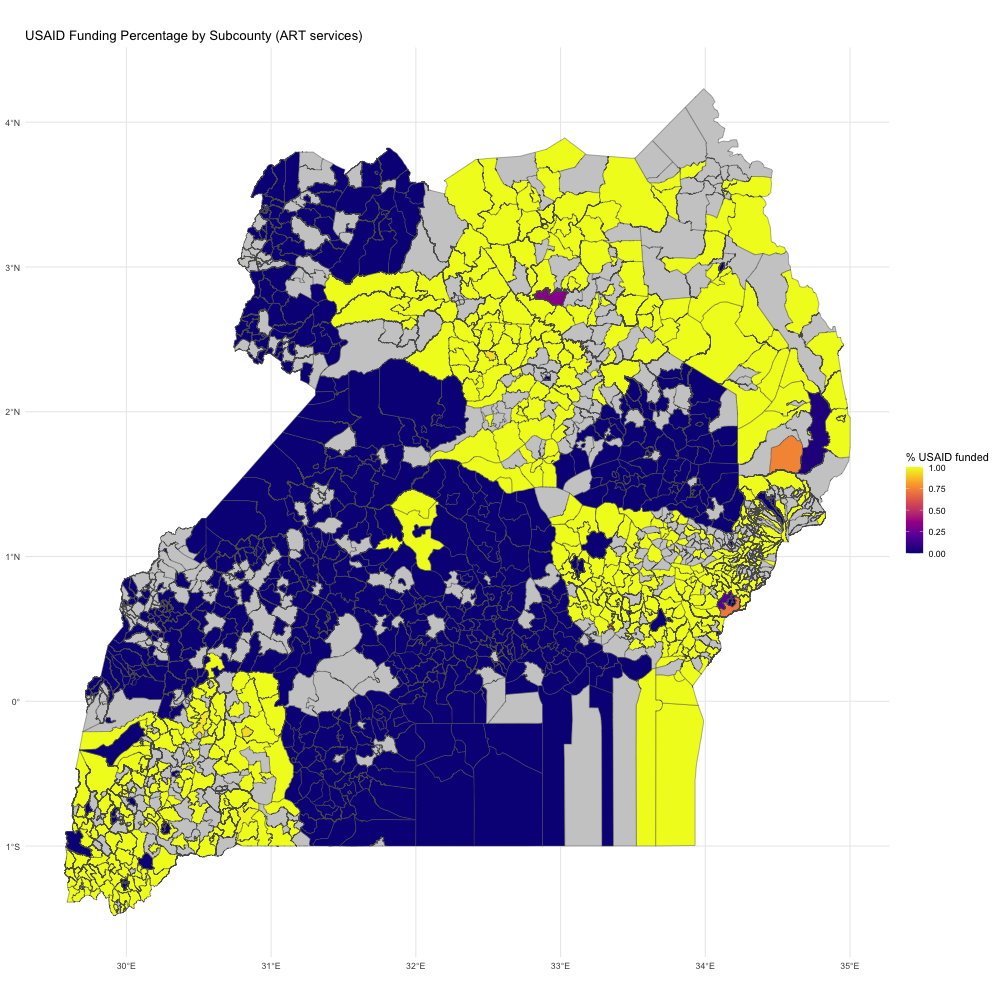

In [110]:
%%R -h 1000 -w 1000

ggplot(usaid_geo) +
  geom_sf(aes(fill = pct_usaid_subcounty)) +
  scale_fill_viridis_c(option = "plasma", na.value = "grey80") +
  theme_minimal() +
  labs(title = "USAID Funding Percentage by Subcounty (ART services)", fill = "% USAID funded")

In [76]:
%%R

art_pop <- read.csv('uganda_art_with_usaid_pct.csv')

In [81]:
%%R

head(
art_pop)

  Statistical.Region UAIS.2011_.Region PIRS.UnitID    PIRS.District
1     Eastern Region        North East J2JiemiIQvD Katakwi District
2     Eastern Region        North East aVQCbe80pl7  Serere District
3     Eastern Region        North East IswqGyDbcgm  Amuria District
4     Eastern Region        North East M864p5iRGub  Amuria District
5     Central Region           Kampala aWtkpwtp9JE Kampala District
6     Eastern Region        North East PCvI4E289K1  Soroti District
       PIRS.Subcounty         PIRS.Service.outlet PIRS.Mechanism.name
1      Usuk Subcounty      Aakum Health Centre II  AIC Soroti  Region
2    Labori Subcounty   Aarapoo Health Centre III  AIC Soroti  Region
3 Abarilela Subcounty Abarilela Health Centre III  AIC Soroti  Region
4    Orungo Subcounty     Adakun Health Centre II                UPMB
5    Central Division    Adventist Medical Centre                UPMB
6    Arapai Subcounty Agirigiroi Health Centre II  AIC Soroti  Region
  pirs.Mechanism.ID PIRS.US.Agency

In [82]:
%%R

art_pop <- art_pop %>%
  mutate(
    PIRS.Subcounty = str_remove(PIRS.Subcounty, " Subcounty$"),  # Only remove " SUBCOUNTY" at the end
    PIRS.Subcounty = str_trim(PIRS.Subcounty)  # Clean any extra spaces
  )

In [83]:
%%R

art_geo <- subcounties %>%
  left_join(art_pop, by = c("ADM4_EN" = "PIRS.Subcounty"))

In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1325 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


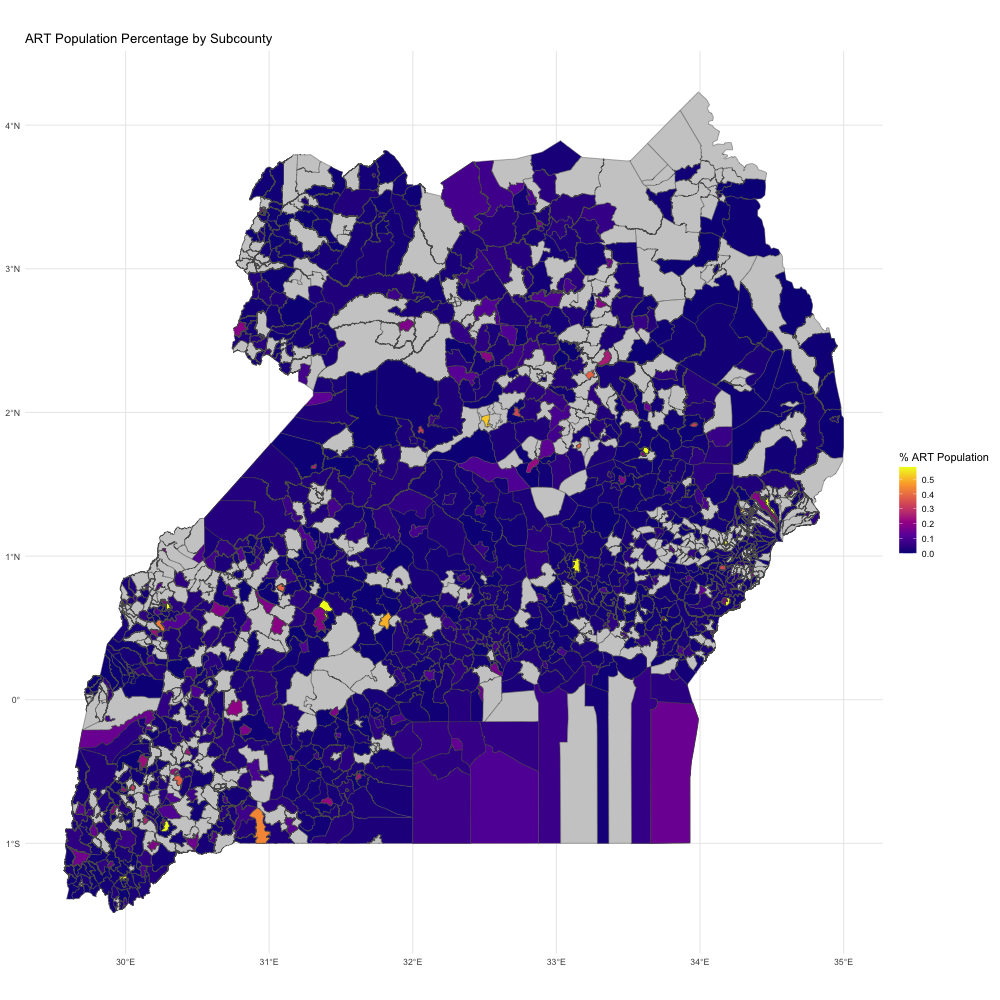

In [84]:
%%R -h 1000 -w 1000

ggplot(art_geo) +
  geom_sf(aes(fill = pct_ART_subcounty)) +
  scale_fill_viridis_c(option = "plasma", na.value = "grey80") +
  theme_minimal() +
  labs(title = "ART Population Percentage by Subcounty", fill = "% ART Population")